### 6.3 Geographical Visualizations with Python

### Contents
#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Data Consistency Checks
#### 4. Plotting Map
#### 5. Answering Research Questions

#### 1.Importing Libraries and Data

In [402]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

In [7]:
#Define Path
path = r'C:\Users\ankit\Desktop\DataAnalysisCF\DataImmersion\Advanced Analytics & Dashboard Design\World Happiness Analysis'

In [172]:
# Import dataset
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','wh_clean.csv'),index_col = False)
df = df.drop(columns = ['Unnamed: 0', 'region'])
df

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023
1363,Zimbabwe,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023
1364,Sierra Leone,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023
1365,Lebanon,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023


In [287]:
# Import json file
country_geo = r'C:/Users/ankit/Desktop/DataAnalysisCF/DataImmersion/Advanced Analytics & Dashboard Design/World Happiness Analysis/02 Data/Original Data/world-countries.json'
continents = r'C:/Users/ankit/Desktop/DataAnalysisCF/DataImmersion/Advanced Analytics & Dashboard Design/World Happiness Analysis/02 Data/Original Data/continents1.json'

#### 2.Data Wrangling

##### Adding new 'region' column 

In [174]:
df.loc[df['country'].isin(["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", 
    "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", 
    "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
    "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", 'Palestinian Territories',
    "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", 'Hong Kong S.A.R. of China',
    "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", 'Turkiye', 'State of Palestine',
    "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", 'Taiwan Province of China','Palestinian Territories',
    "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", 
    "Uzbekistan", "Vietnam", "Yemen"]),'region'] = 'Asia' 

In [176]:
df.loc[df['country'].isin(["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
    "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 'Czechia',
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", 'North Cyprus',
    "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Turkey", "Ukraine", "United Kingdom", "Vatican City"]),'region'] = 'Europe' 

In [178]:
df.loc[df['country'].isin([ "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", 
    "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", 
    "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", 'Puerto Rico',
    "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", 
    "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"]),'region'] = 'North America' 

In [180]:
df.loc[df['country'].isin(["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", 
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]),'region'] = 'South America' 

In [182]:
df.loc[df['country'].isin(["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", 
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", 
    "Congo (Congo-Brazzaville)", "Democratic Republic of the Congo", 'Congo (Kinshasa)',
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", 'Congo (Brazzaville)',
    "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 'Congo',
    "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", 
    "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", 'Somaliland Region',
    "Namibia", "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe", 
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 'Somaliland region','Swaziland',
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", 
    "Zambia", "Zimbabwe"]),'region'] = 'Africa' 

In [184]:
df.loc[df['country'].isin(["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", 
    "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", 
    "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]),'region'] = 'Oceania' 

In [188]:
df

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Europe
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Europe
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Europe
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Europe
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,North America
...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,Africa
1363,Zimbabwe,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,Africa
1364,Sierra Leone,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,Africa
1365,Lebanon,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,Asia


In [190]:
df.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
region                          0
dtype: int64

In [194]:
df_nan = df.loc[~df['region'].isin(['Asia','Europe','North America','South America','Africa','Oceania'])]
df_nan

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region


In [294]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','wh_region.csv'))

#### 3. Data Consistency Checks

In [200]:
# Checking missing values
df.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
region                          0
dtype: int64

In [202]:
df.dtypes

country                          object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
region                           object
dtype: object

In [210]:
#Checking duplicate values
dup = df.duplicated()
dup.shape

(1367,)

#### Checking Extreme Values

<Axes: xlabel='gdp_per_capita', ylabel='Count'>

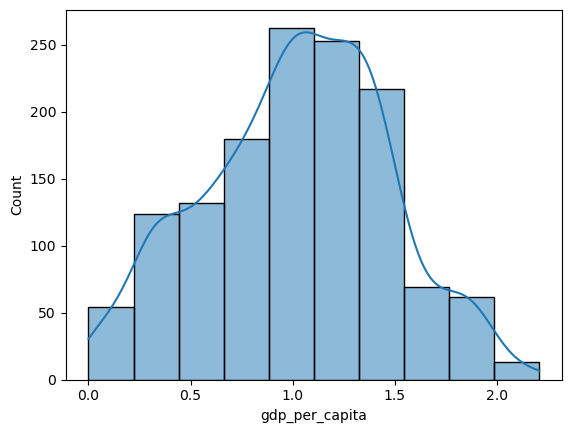

In [215]:
# gdp_per_capita
sns.histplot(df['gdp_per_capita'], bins = 10, kde = True)

<Axes: xlabel='social_support', ylabel='Count'>

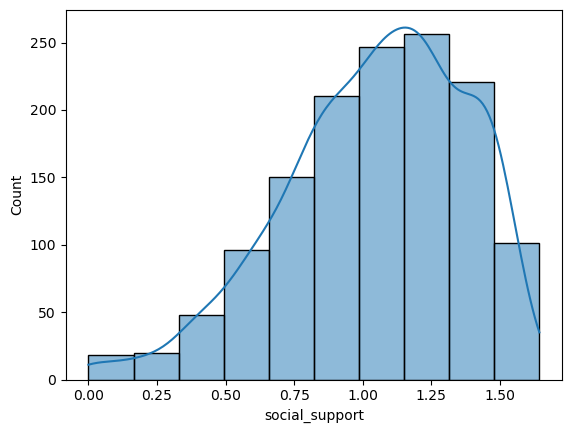

In [217]:
# social_support
sns.histplot(df['social_support'], bins = 10, kde = True)

<Axes: xlabel='healthy_life_expectancy', ylabel='Count'>

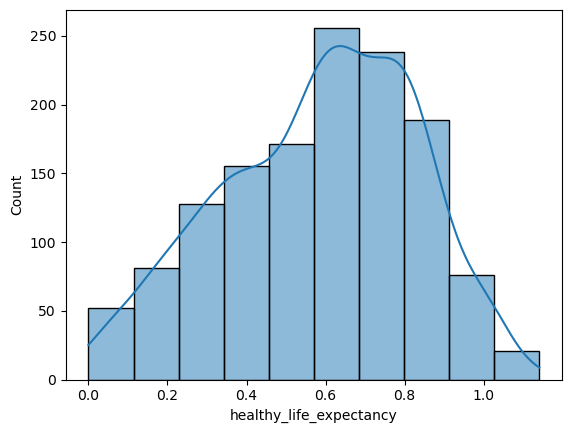

In [219]:
# healthy_life_expectancy
sns.histplot(df['healthy_life_expectancy'], bins = 10, kde = True)

<Axes: xlabel='freedom_to_make_life_choices', ylabel='Count'>

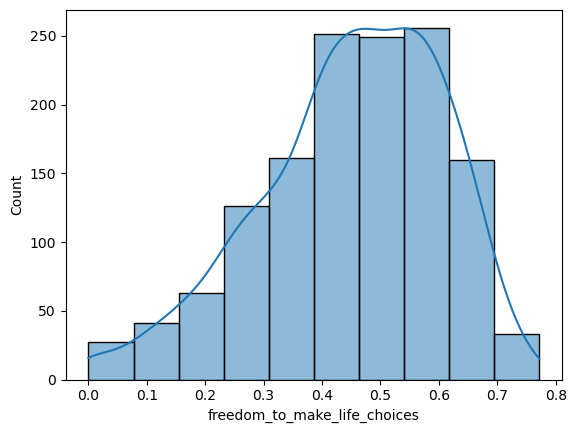

In [221]:
#freedom_to_make_life_choices
sns.histplot(df['freedom_to_make_life_choices'], bins = 10, kde = True)

<Axes: xlabel='generosity', ylabel='Count'>

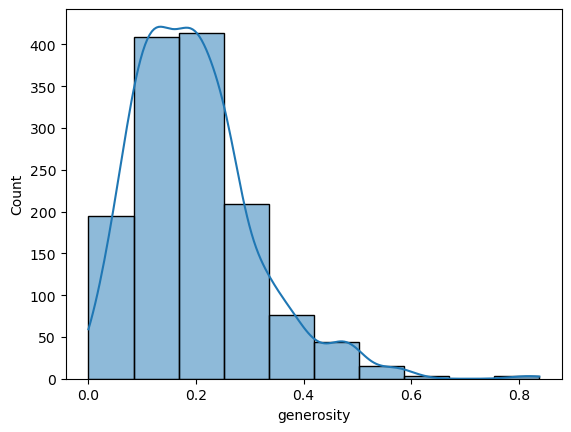

In [223]:
# generosity
sns.histplot(df['generosity'], bins = 10, kde = True)

<Axes: xlabel='perceptions_of_corruption', ylabel='Count'>

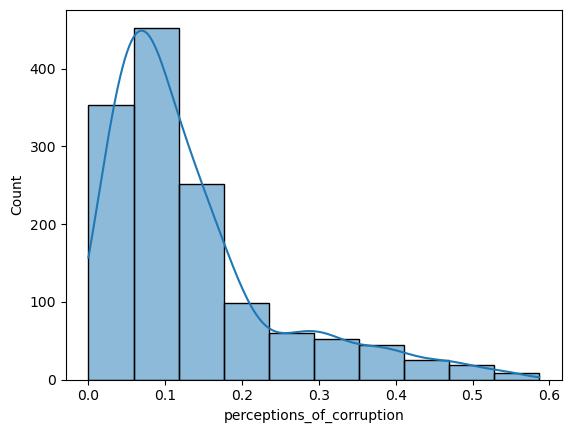

In [225]:
# perceptions_of_corruption
sns.histplot(df['perceptions_of_corruption'], bins = 10, kde = True)

<Axes: xlabel='happiness_score', ylabel='Count'>

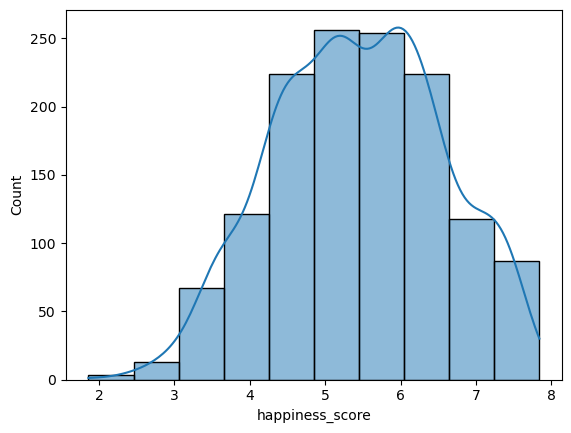

In [227]:
#happiness_score
sns.histplot(df['happiness_score'], bins = 10, kde = True)

##### There are no extreme values

#### 4. Plotting chorolopleth

In [255]:
data_to_plot = df[['country','happiness_score']]
data_to_plot.head()

,country,happiness_score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


#### Plotting Choropleth Map for different countries

In [300]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['country', 'happiness_score'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "happiness_score").add_to(map)
folium.LayerControl().add_to(map)
map.save(os.path.join(path,'04 Analysis','countries.html'))

map

#### Plotting choropleth map for different regions

In [237]:
data_to_plot2 = df[['region','happiness_score']]
data_to_plot2.head()

,region,happiness_score
0,Europe,7.587
1,Europe,7.561
2,Europe,7.527
3,Europe,7.522
4,North America,7.427


In [302]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = continents, 
    data = data_to_plot2,
    columns = ['region', 'happiness_score'],
    key_on = 'feature.properties.CONTINENT', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "happiness_score").add_to(map)
folium.LayerControl().add_to(map)
map.save(os.path.join(path,'04 Analysis','continents.html'))
map

#### Analysis

In [374]:
# 3.	What is the average happiness score across all countries?
df.groupby('country').happiness_score.mean().sort_values(ascending = False)

country
Finland                     7.662744
Denmark                     7.579733
Iceland                     7.522278
Switzerland                 7.493322
Norway                      7.473889
                              ...   
Syria                       3.292200
Burundi                     3.277900
South Sudan                 3.269320
Central African Republic    3.202580
Afghanistan                 2.990767
Name: happiness_score, Length: 171, dtype: float64

In [376]:
##	What is the average happiness score across all continents?
df.groupby('region').happiness_score.mean().sort_values(ascending = False)

region
Oceania          7.250467
North America    6.152889
Europe           6.137438
South America    6.010088
Asia             5.293879
Africa           4.372276
Name: happiness_score, dtype: float64

In [426]:
# Checking if high life expectancy correspond to high happiness_score
aggregated_df = df.groupby('country').agg({'happiness_score': 'mean',  'healthy_life_expectancy': 'mean'})
sorted_avg = aggregated_df.sort_values(by='happiness_score', ascending=False).reset_index()
sorted_avg

,country,happiness_score,healthy_life_expectancy
0,Finland,7.662744,0.820161
1,Denmark,7.579733,0.820286
2,Iceland,7.522278,0.858174
3,Switzerland,7.493322,0.878014
4,Norway,7.473889,0.831860
...,...,...,...
166,Syria,3.292200,0.566281
167,Burundi,3.277900,0.215465
168,South Sudan,3.269320,0.200421
169,Central African Republic,3.202580,0.040153


In [428]:
# Plotting Dual Map for comparing happiness_score with health_life_expectency

from folium.plugins import DualMap

# Create a DualMap instance
dual_map = DualMap(location=[0, 0], zoom_start=2)

# Add choropleth for happiness_score on the left map
folium.Choropleth(
    geo_data= country_geo,
    name='choropleth',
    data=sorted_avg,
    columns=['country', 'happiness_score'],
    key_on = 'feature.properties.name', 
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='happiness_score'
).add_to(dual_map.m1)  # Left map

# Add choropleth for healthy_life_expectancy on the right map
folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=sorted_avg,
    columns=['country', 'healthy_life_expectancy'],
    key_on = 'feature.properties.name', 
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='healthy_life_expectancy'
).add_to(dual_map.m2)  # Right map

# Display map
dual_map


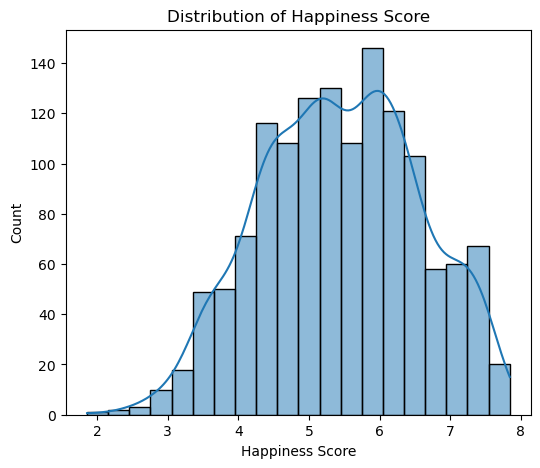

In [410]:
# Plot a histogram of happiness_score
plt.figure(figsize=(6, 5))
sns.histplot(df['happiness_score'], bins=20, kde=True)
plt.xlabel('Happiness Score')
plt.title('Distribution of Happiness Score')
plt.show()

In [450]:
# Finding Average of all variables to know how they are corelated
df_agg = df.groupby('country').agg({'happiness_score': 'mean', 'gdp_per_capita': 'mean' , 'social_support': 'mean',
                                    'healthy_life_expectancy': 'mean' , 'freedom_to_make_life_choices' : 'mean' ,
                                    'generosity': 'mean', 'perceptions_of_corruption':'mean' })

df_sort = df_agg.sort_values(by='happiness_score', ascending=False).reset_index()
df_sort.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'avg_var.csv'))
df_sort

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.662744,1.477332,1.402297,0.820161,0.663222,0.178620,0.446692
1,Denmark,7.579733,1.523844,1.404543,0.820286,0.659315,0.271242,0.464903
2,Iceland,7.522278,1.511457,1.458181,0.858174,0.656239,0.363439,0.154807
3,Switzerland,7.493322,1.596177,1.369674,0.878014,0.637796,0.239802,0.406196
4,Norway,7.473889,1.617235,1.390950,0.831860,0.671494,0.290104,0.390873
...,...,...,...,...,...,...,...,...
166,Syria,3.292200,0.699109,0.355931,0.566281,0.081700,0.431285,0.159547
167,Burundi,3.277900,0.044605,0.402808,0.215465,0.154286,0.184144,0.137021
168,South Sudan,3.269320,0.344654,0.504558,0.200421,0.106258,0.236119,0.111020
169,Central African Republic,3.202580,0.033914,0.000000,0.040153,0.316489,0.245148,0.048144


#### Answering Research Questions:


-- Fixed the mismatched country names in json file to match with the dataset.


1. Which countries have the highest and lowest happiness scores?
- Top 5 happy countries based on happiness score are Finland, Denmark, Iceland, Switzerland and Norway.
- 5 Least happy countries are Syria, Burundi, South Sudan, Central African Republic and Afghanistan.


2. How does the average happiness score vary across different regions?
Oceania has the high average happiness score followed by North America and Europe. Asia has the least happiness score.

Oceania          7.250467
North America    6.152889
Europe           6.137438
South America    6.010088
Asia             5.293879
Africa           4.372276


4.	What is the average happiness score across all countries?
- Result is exported as dataset.


10.	Are there specific countries where high life expectancy does not correspond to high happiness (or vice versa)?
- Countries with high happiness_score normally have high life expectency but there are exceptions. Top 5 countries with high happiness score are not the top 5 countries with high life expectency.
- United States of America, Brazil, Saudi Arabia have high happiness score but low health life expectency.
- China, Greece, Spain, Italy have high health life expectency but low happiness score.


14. How does the distribution of happiness scores look? (e.g., skewed, normal, etc.)
- From the histogram we can see that, The distribution is close to normal, but it appears to be slightly right-skewed (positive skewness). The tail on the right side extends further, indicating that there are some higher values, though not extreme.
- The highest frequencies are around a score of 5-6, with values tapering off as you move away from the center. This is similar to a normal distribution’s bell shape but slightly shifted due to the skew.

  

15.	Are there common traits among the least happy countries?
- Least happy countries have low gdp per capita, low health life expectencz and low social support.